In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
def csv_to_pandas(file_path):
    df = pd.read_csv(file_path)
    return df

def generate_zooms_plot(df, dataset):
    zooms = [int(path.split('/')[2]) for path in df['Name'][:-1]]
    # Create a new figure
    plt.figure()

    # Create a scatter plot
    plt.scatter(zooms, df['Median Response Time'][:-1])

    # Add title and labels
    plt.title(dataset)
    plt.xlabel('Zoom')
    plt.ylabel('Time (ms)')

    # Display the plot
    plt.show()    

# The Datasets

In [4]:
csv_to_pandas('zarr_info.csv')

,source,variable,shape,lat resolution,lon resolution,chunk shape,chunk size mb,compression
0,s3://veda-data-store-staging/EIS/zarr/FWI-GEOS...,GEOS-5_FWI,"(26880, 533, 1152)",0.25,0.3125,"(120, 100, 100)",4.577637,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, ..."
1,s3://power-analysis-ready-datastore/power_901_...,TS,"(492, 361, 576)",0.50,0.6250,"(492, 25, 25)",2.346039,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, ..."
2,s3://cmip6-pds/CMIP6/CMIP/NASA-GISS/GISS-E2-1-...,tas,"(1980, 90, 144)",2.00,2.5000,"(600, 90, 144)",29.663086,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, ..."
3,https://ncsa.osn.xsede.org/Pangeo/pangeo-forge...,sst,"(15044, 720, 1440)",0.25,0.2500,"(1, 1, 720, 1440)",1.977539,Zlib(level=4)
4,s3://yuvipanda-test1/cmr/gpm3imergdl.zarr,precipitationCal,"(8149, 3600, 1800)",0.10,0.1000,"(10, 3600, 1800)",247.192383,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, ..."


# GPM IMERG `preciptationCal` (0.1°x0.1°)

In [25]:
file_path = 'results/gpm3imergdl_stats.csv'
gpmimerg_df = csv_to_pandas(file_path)
gpmimerg_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/1/0/1.png?reference=False&variable=prec...,1,0,3929.024623,3929.024623,3929.024623,3929.024623,7800.0,0.009815,...,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
1,GET,/tiles/2/2/1.png?reference=False&variable=prec...,1,0,3612.426499,3612.426499,3612.426499,3612.426499,12070.0,0.009815,...,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600
2,GET,/tiles/2/3/1.png?reference=False&variable=prec...,1,0,3656.088411,3656.088411,3656.088411,3656.088411,14663.0,0.009815,...,3700,3700,3700,3700,3700,3700,3700,3700,3700,3700
3,GET,/tiles/2/3/2.png?reference=False&variable=prec...,1,0,3643.817734,3643.817734,3643.817734,3643.817734,13162.0,0.009815,...,3600,3600,3600,3600,3600,3600,3600,3600,3600,3600
4,GET,/tiles/3/0/0.png?reference=False&variable=prec...,1,0,3685.454417,3685.454417,3685.454417,3685.454417,693.0,0.009815,...,3700,3700,3700,3700,3700,3700,3700,3700,3700,3700


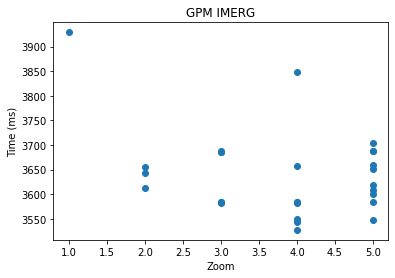

In [26]:
generate_zooms_plot(gpmimerg_df, 'GPM IMERG')

# GOES FWI (0.25°x0.3125°) results

In [27]:
file_path = 'results/FWI-GEOS_stats.csv'
goes_df = csv_to_pandas(file_path)
goes_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/1/0/1.png?reference=False&variable=GEOS...,1,0,9842.121784,9842.121784,9842.121784,9842.121784,4532.000000,0.001177,...,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
1,GET,/tiles/2/2/1.png?reference=False&variable=GEOS...,2,0,9009.012594,9130.085086,9009.012594,9251.157577,14358.000000,0.002354,...,9300,9300,9300,9300,9300,9300,9300,9300,9300,9300
2,GET,/tiles/2/2/2.png?reference=False&variable=GEOS...,1,0,9286.802968,9286.802968,9286.802968,9286.802968,8664.000000,0.001177,...,9300,9300,9300,9300,9300,9300,9300,9300,9300,9300
3,GET,/tiles/3/0/1.png?reference=False&variable=GEOS...,1,0,8907.322770,8907.322770,8907.322770,8907.322770,693.000000,0.001177,...,8900,8900,8900,8900,8900,8900,8900,8900,8900,8900
4,GET,/tiles/3/0/2.png?reference=False&variable=GEOS...,1,0,8986.847845,8986.847845,8986.847845,8986.847845,693.000000,0.001177,...,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,GET,/tiles/8/75/157.png?reference=False&variable=G...,1,0,8251.587586,8251.587586,8251.587586,8251.587586,752.000000,0.001177,...,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300
93,GET,/tiles/8/76/116.png?reference=False&variable=G...,1,0,9693.293466,9693.293466,9693.293466,9693.293466,693.000000,0.001177,...,9700,9700,9700,9700,9700,9700,9700,9700,9700,9700
94,GET,/tiles/8/81/166.png?reference=False&variable=G...,1,0,8435.835459,8435.835459,8435.835459,8435.835459,735.000000,0.001177,...,8400,8400,8400,8400,8400,8400,8400,8400,8400,8400
95,GET,/tiles/8/90/93.png?reference=False&variable=GE...,1,0,8328.488582,8328.488582,8328.488582,8328.488582,693.000000,0.001177,...,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300


In [ ]:
generate_zooms_plot(goes_df, 'GOES FWI')

# NOAA OISST Reference (0.25° x 0.25°) Results

In [5]:
file_path = 'results/noaa-oisst_stats.csv'
noaa_oisst_df = csv_to_pandas(file_path)
noaa_oisst_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/1/0/1.png?reference=True&variable=sst&r...,20,0,5400.000000,6482.021459,5130.730704,8056.156452,14524.000000,0.337934,...,7600,7700,7700,7800,8100,8100,8100,8100,8100,8100
1,GET,/tiles/2/0/0.png?reference=True&variable=sst&r...,10,0,5100.000000,5125.492091,4986.881016,5360.441729,3307.000000,0.168967,...,5100,5200,5300,5400,5400,5400,5400,5400,5400,5400
2,GET,/tiles/2/0/1.png?reference=True&variable=sst&r...,10,0,5100.000000,5131.751161,4969.479930,5325.769601,18496.000000,0.168967,...,5200,5200,5200,5300,5300,5300,5300,5300,5300,5300
3,GET,/tiles/2/1/1.png?reference=True&variable=sst&r...,10,0,5100.000000,5104.645959,4958.198531,5227.995319,22783.000000,0.168967,...,5200,5200,5200,5200,5200,5200,5200,5200,5200,5200
4,GET,/tiles/2/1/3.png?reference=True&variable=sst&r...,10,0,5100.000000,5082.151862,4913.439728,5218.303144,693.000000,0.168967,...,5100,5100,5200,5200,5200,5200,5200,5200,5200,5200
5,GET,/tiles/2/2/2.png?reference=True&variable=sst&r...,20,0,5100.000000,5125.794946,4946.374127,5404.189263,17737.000000,0.337934,...,5200,5200,5200,5300,5400,5400,5400,5400,5400,5400
6,GET,/tiles/3/0/5.png?reference=True&variable=sst&r...,10,0,5100.000000,5110.740682,4922.299050,5320.838953,6700.000000,0.168967,...,5100,5100,5200,5300,5300,5300,5300,5300,5300,5300
7,GET,/tiles/3/6/5.png?reference=True&variable=sst&r...,7,0,5200.000000,5192.108026,4987.424197,5385.187589,6528.000000,0.118277,...,5200,5300,5300,5400,5400,5400,5400,5400,5400,5400
8,GET,/tiles/3/7/7.png?reference=True&variable=sst&r...,1,0,5223.850458,5223.850458,5223.850458,5223.850458,693.000000,0.016897,...,5200,5200,5200,5200,5200,5200,5200,5200,5200,5200
9,NaN,Aggregated,98,0,5200.000000,5400.742370,4913.439728,8056.156452,12361.214286,1.655878,...,5200,5200,5300,7400,7700,7800,8100,8100,8100,8100


In [ ]:
generate_zooms_plot(noaa_oisst_df, 'NOAA OISST Reference')

# POWER Results (0.5° x 0.625°)

In [7]:
file_path = 'results/power_meteorology_stats.csv'
power_df = csv_to_pandas(file_path)
power_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/1/0/1.png?reference=False&variable=TS&r...,20,0,1200.0,1293.971391,1034.367094,1730.036484,11206.000000,0.337506,...,1300,1400,1400,1600,1700,1700,1700,1700,1700,1700
1,GET,/tiles/2/0/1.png?reference=False&variable=TS&r...,10,0,820.0,858.967510,745.473035,1107.122240,9455.000000,0.168753,...,860,880,960,1100,1100,1100,1100,1100,1100,1100
2,GET,/tiles/2/1/1.png?reference=False&variable=TS&r...,10,0,810.0,846.504194,756.632956,942.859970,10811.000000,0.168753,...,880,900,930,940,940,940,940,940,940,940
3,GET,/tiles/2/1/2.png?reference=False&variable=TS&r...,10,0,840.0,844.445860,812.997174,887.190159,8592.000000,0.168753,...,850,850,880,890,890,890,890,890,890,890
4,GET,/tiles/2/2/1.png?reference=False&variable=TS&r...,10,0,820.0,842.159213,781.032233,924.602733,13246.000000,0.168753,...,900,900,910,920,920,920,920,920,920,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,GET,/tiles/6/59/0.png?reference=False&variable=TS&...,10,0,560.0,599.201299,529.002395,707.565169,713.000000,0.168753,...,570,690,700,710,710,710,710,710,710,710
84,GET,/tiles/6/59/20.png?reference=False&variable=TS...,7,0,610.0,624.906362,541.922433,733.829211,861.000000,0.118127,...,640,720,720,730,730,730,730,730,730,730
85,GET,/tiles/6/8/24.png?reference=False&variable=TS&...,4,0,560.0,566.147894,550.056240,581.971119,811.000000,0.067501,...,570,580,580,580,580,580,580,580,580,580
86,GET,/tiles/6/8/32.png?reference=False&variable=TS&...,8,0,610.0,747.938682,584.624782,1264.353647,813.000000,0.135003,...,720,880,880,1300,1300,1300,1300,1300,1300,1300


In [ ]:
generate_zooms_plot(power_df, 'POWER TS')

# CMIP6 Historical Results (2° x 2.5°)

In [6]:
file_path = 'results/cmip6_stats.csv'
cmip6_df = csv_to_pandas(file_path)
cmip6_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/1/0/0.png?reference=False&variable=tas&...,30,0,940.0,2114.355177,899.948562,5534.472995,3886.000000,0.141396,...,1100,4600,4800,5200,5500,5500,5500,5500,5500,5500
1,GET,/tiles/2/0/2.png?reference=False&variable=tas&...,30,0,930.0,941.591827,892.061699,1048.087652,1328.000000,0.141396,...,940,950,980,1000,1000,1000,1000,1000,1000,1000
2,GET,/tiles/2/1/0.png?reference=False&variable=tas&...,30,0,960.0,1100.174953,887.227890,4885.042030,1395.000000,0.141396,...,1000,1000,1000,1100,1100,4900,4900,4900,4900,4900
3,GET,/tiles/2/3/1.png?reference=False&variable=tas&...,30,0,930.0,948.055452,886.515413,1069.246770,2272.000000,0.141396,...,960,980,980,1000,1000,1100,1100,1100,1100,1100
4,GET,/tiles/3/2/2.png?reference=False&variable=tas&...,29,0,940.0,945.086566,899.372118,1050.663233,1236.000000,0.136682,...,960,960,970,980,1000,1100,1100,1100,1100,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GET,/tiles/8/49/156.png?reference=False&variable=t...,20,0,930.0,943.223295,894.072087,1045.760368,695.000000,0.094264,...,950,960,980,1000,1000,1000,1000,1000,1000,1000
96,GET,/tiles/8/51/145.png?reference=False&variable=t...,20,0,930.0,945.120539,891.333183,1081.622369,709.000000,0.094264,...,960,970,970,1000,1100,1100,1100,1100,1100,1100
97,GET,/tiles/8/62/159.png?reference=False&variable=t...,20,0,930.0,952.392344,905.469681,1081.457478,708.000000,0.094264,...,940,1000,1000,1000,1100,1100,1100,1100,1100,1100
98,GET,/tiles/8/76/52.png?reference=False&variable=ta...,20,0,940.0,961.579348,911.429300,1137.808017,714.000000,0.094264,...,970,980,1000,1000,1100,1100,1100,1100,1100,1100


In [ ]:
generate_zooms_plot(cmip6_df, 'CMIP6')